En primer lugar cargamos los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import csv
### Leer archivo .csv
def readCSV(file):
    X = []
    Y = []
    with open(file, newline='') as File:
        reader = csv.reader(File)
        for r in reader:
          X.append(np.array(float(r[0])))
          Y.append(np.array(float(r[1])))
    return X , Y


#guardamos los datos de prueba
spectraRealX, spectraRealY = readCSV('/content/drive/My Drive/RNA/Tarea 5/SpectraReal.csv')

#guardamos los datos de prueba
spectra20X, spectra20Y = readCSV('/content/drive/My Drive/RNA/Tarea 5/Spectra20.csv')

#guardamos los datos de entrenamiento
spectra100X, spectra100Y = readCSV('/content/drive/My Drive/RNA/Tarea 5/Spectra100.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Graficamos para ver la relacion entre los datos que utlizaremos para crear el aproximador y el patron real subyacente

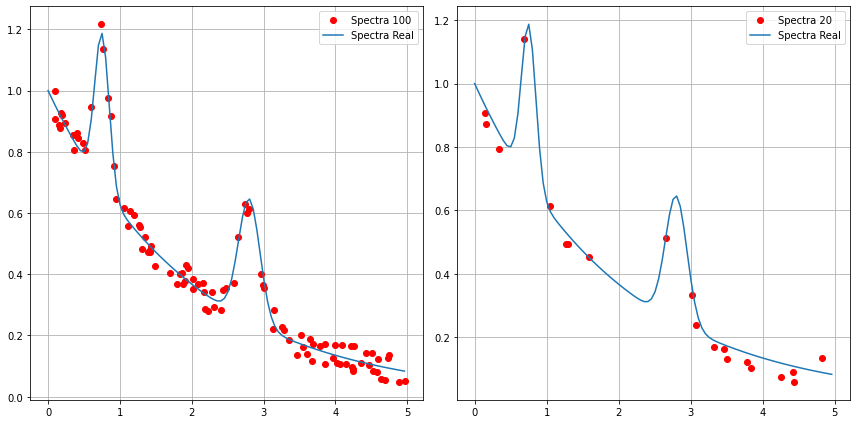

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

plt.subplot(1, 2, 1)
p1 = plt.plot(spectra100X, spectra100Y, 'ro')
p2 = plt.plot(spectraRealX, spectraRealY)
plt.legend((p1[0], p2[0]), ('Spectra 100', 'Spectra Real'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(spectra20X, spectra20Y, 'ro')
p2 = plt.plot(spectraRealX, spectraRealY)
plt.legend((p1[0], p2[0]), ('Spectra 20', 'Spectra Real'))
plt.grid(True)

fig.tight_layout()
plt.show()

Ejercicio #1

In [ ]:
from math import exp
import numpy as np

def gauss(center, x, sigma=1):
    return exp(-((center - x)**2) / (2*(sigma**2)))

def generateG(X, sigma=1):
    G = []
    row = []
    for i in X:
        for j in X:
            row.append(gauss(i,j,sigma))
        G.append(row)
        row = []
    return np.array([xi for xi in G])

def predict(W, xi, centers, sigma=1):
    return np.dot([gauss(xj, xi) for xj in centers], W)

def makePredictions(W, X, centers, sigma=1):
    phi = []
    for xi in X:
        phi.append(predict(W, xi, centers))
    return phi

In [ ]:
testX = np.linspace(0, 5, 500)
#Sin Regularizacion
#Spectra20
G20 = generateG(spectra20X)
print('Numero de condicion de la matriz asociada para spectra20 sin regularizacion= %f' % (np.linalg.cond(G20)))
W20 = np.dot(np.linalg.pinv(G20), spectra20Y)
predictions20 =  makePredictions(W20, testX, spectra20X)

#Con Regularizacion
#regularParam = 0.000003
#regularParam = 0.0003
regularParam = 0.00003
#Spectra20
G20Reg = generateG(spectra20X) + regularParam * np.identity(20)
print('Numero de condicion de la matriz asociada para spectra20 con regularizacion= %f' % (np.linalg.cond(G20Reg)))
W20Reg = np.dot(np.linalg.pinv(G20Reg), spectra20Y)
predictions20Reg =  makePredictions(W20Reg, testX, spectra20X)

Numero de condicion de la matriz asociada para spectra20 sin regularizacion= 534680131341278848.000000
Numero de condicion de la matriz asociada para spectra20 con regularizacion= 303449.331313


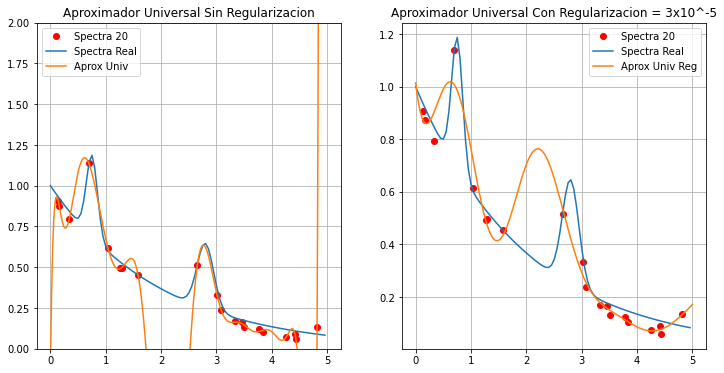

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(spectra20X, spectra20Y, 'ro')
p2 = plt.plot(spectraRealX, spectraRealY)
p3 = plt.plot(testX, predictions20)
plt.legend((p1[0], p2[0], p3[0]), ('Spectra 20', 'Spectra Real', 'Aprox Univ'))
plt.title('Aproximador Universal Sin Regularizacion')
plt.ylim(0, 2)
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(spectra20X, spectra20Y, 'ro')
p2 = plt.plot(spectraRealX, spectraRealY)
p3 = plt.plot(testX, predictions20Reg)
plt.legend((p1[0], p2[0], p3[0]), ('Spectra 20', 'Spectra Real', 'Aprox Univ Reg'))
plt.title('Aproximador Universal Con Regularizacion = 3x10^-5')
plt.grid(True)

plt.show()

Conclusiones ejercicio #1

Se observa que con el aproximador universal efectivamente logramos tener un acierto del 100% con los datos de entrenamiento, sin embargo la fuertes oscilaciones que presenta el modelo causa que en los extremos y aquellas partes donde la separacion entre datos de de entrenamiento se hace mayor, se obtenga resultados sumamente distantes de los deseados.

Sin embargo al regularizar, vemos que logramos aminorar este problema considerablemente sacrificando un poco de precision en ciertos puntos de entrenamiento pero acercandonos mas al patron subyacente. Tambien se aprecia que la regularizacion disminuye considerablemente el numero de condicion de la matriz, asi que los calculos introducen menos impreciones a la prediccion.

El mejor parametro de regularizacion encontrado fue 0.00003, pues si este era mucho menor el valor para x = 0, crecia proporcionalemente, y si se aumentaba se perdia precision en resto de los puntos.

Ejercicio #2

Calculamos los centros de forma aleatoria

In [ ]:
import random
def selectRandomCenters(X, k):
    centers = []
    minX = int(round(min(X) * 100))
    maxX = int(round(max(X) * 100))

    for i in range(k):
        centers.append(random.randint(minX, maxX) / 100)
    return centers

def gauss(center, x, sigma=(0.5**(1/2))):
    return exp(-((center - x)**2) / (2*(sigma**2)))

def generateGRandom(X, centers, sigma=(0.5**(1/2))):
    G = []
    row = []
    for i in X:
        for t in centers:
            row.append(gauss(i,t, sigma))
        row.append(1)
        G.append(row)
        row = []
    return np.array([xi for xi in G])

def predict(W, xi, centers, sigma=(0.5**(1/2))):
    return np.dot([gauss(xj, xi, sigma) for xj in centers] + [1], W)

def makePredictions(W, X, centers, sigma=(0.5**(1/2))):
    phi = []
    for xi in X:
        phi.append(predict(W, xi, centers, sigma))
    return phi

In [ ]:
#Datos de para probar la prediccion
testX = np.linspace(0, 5, 500)

#numero de centros
m = 26

sigma = 0.25

#Centros Aleatorios
centers = selectRandomCenters(spectra100X, m)

#Con Parametro de dispersion 0.5**(1/2)
G = generateGRandom(spectra100X, centers)
W = np.dot(np.linalg.pinv(np.dot(G.transpose(), G)), np.dot(G.transpose(), spectra100Y))
predictionsR05 = makePredictions(W, testX, centers)

#Con Parametro de dispersion 0.25
G = generateGRandom(spectra100X, centers, sigma)
W = np.dot(np.linalg.pinv(np.dot(G.transpose(), G)), np.dot(G.transpose(), spectra100Y))
predictionsR02 = makePredictions(W, testX, centers, sigma)

#Centros escogidos por Kmeans
import pandas as pd
from sklearn.cluster import KMeans
#Volvemos a cargar los datos pero esta vez juntos en forma de dataframe
data = pd.read_csv('/content/drive/My Drive/RNA/Tarea 5/Spectra100.csv', sep=",", header=None).values
kmeans = KMeans(n_clusters=m, random_state=0).fit(data)
centers = kmeans.cluster_centers_[:,0]

#Con Parametro de dispersion 0.5**(1/2)
G = generateGRandom(spectra100X, centers)
W = np.dot(np.linalg.pinv(np.dot(G.transpose(), G)), np.dot(G.transpose(), spectra100Y))
predictionsK05 = makePredictions(W, testX, centers)

#Con Parametro de dispersion 0.25
G = generateGRandom(spectra100X, centers, sigma)
W = np.dot(np.linalg.pinv(np.dot(G.transpose(), G)), np.dot(G.transpose(), spectra100Y))
predictionsK02 = makePredictions(W, testX, centers, sigma)

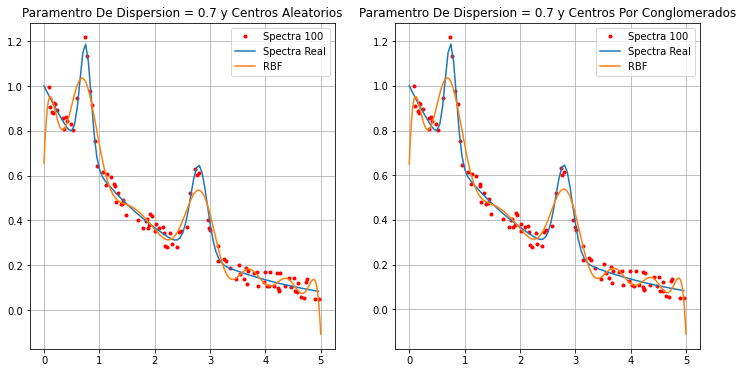

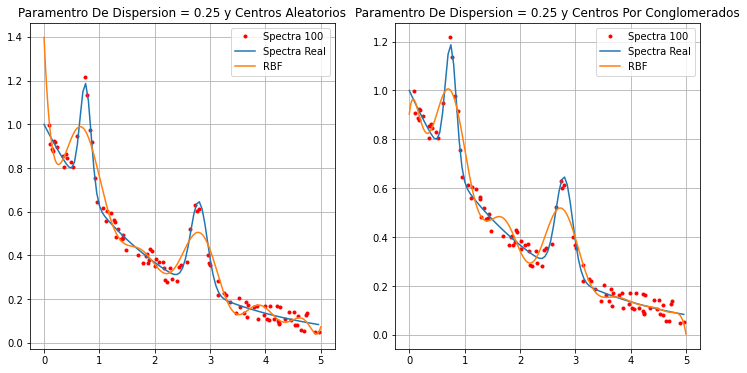

In [ ]:
# Graficamos
import matplotlib.pyplot as plt

#Parte a)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(spectra100X, spectra100Y, 'r.')
p2 = plt.plot(spectraRealX, spectraRealY)
p3 = plt.plot(testX, predictionsR05)
plt.legend((p1[0], p2[0], p3[0]), ('Spectra 100', 'Spectra Real', 'RBF'))
plt.title('Paramentro De Dispersion = 0.7 y Centros Aleatorios')
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(spectra100X, spectra100Y, 'r.')
p2 = plt.plot(spectraRealX, spectraRealY)
p3 = plt.plot(testX, predictionsK05)
plt.legend((p1[0], p2[0], p3[0]), ('Spectra 100', 'Spectra Real', 'RBF'))
plt.title('Paramentro De Dispersion = 0.7 y Centros Por Conglomerados')
plt.grid(True)

plt.show()

#Parte b)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(spectra100X, spectra100Y, 'r.')
p2 = plt.plot(spectraRealX, spectraRealY)
p3 = plt.plot(testX, predictionsR02)
plt.legend((p1[0], p2[0], p3[0]), ('Spectra 100', 'Spectra Real', 'RBF'))
plt.title('Paramentro De Dispersion = 0.25 y Centros Aleatorios')
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(spectra100X, spectra100Y, 'r.')
p2 = plt.plot(spectraRealX, spectraRealY)
p3 = plt.plot(testX, predictionsK02)
plt.legend((p1[0], p2[0], p3[0]), ('Spectra 100', 'Spectra Real', 'RBF'))
plt.title('Paramentro De Dispersion = 0.25 y Centros Por Conglomerados')
plt.grid(True)

plt.show()

Conclusiones Ejercicio #2

Luego de experimentar con una variedad de numero de centros entre $\left[3,50\right]$ se determino que el menor numero que proporcionaba mejores resultados fue 26. Y el mejor valor de sigma 0.25, de entre $\left[0.1, 1\right]$, observando al graficar los resultados. En general este experimento muestra la importancia de escoger adecuadamente el numero de centros y el valor de dispercion. Adicionalmente no se observo una diferencia contundente en favor de ninguno de los metodos de escogencia de los centros para los valores optimos encontrados, sin embargo se prefiere el metodo deterministico por ofrecer un resultado mas consistente y predecible. 

Ejercicio #3

$$k_3 \left(x,z \right) =  k_1 \left(x,z \right) k_2 \left(x,z \right)$$

Sabemos que $k_1$ y $k_2$ son kernels por lo tanto podemos desarrollarlos como la sumatorio de productos internos:

$$k_1 \left(x,z \right) k_2 \left(x,z \right) = \left( \sum^n_{i=1}\phi_i^{(1)}\left( x \right) \phi_i^{(1)}\left( z \right) \right) \cdot \left( \sum^m_{j=1}\phi_j^{(2)}\left( x \right) \phi_j^{(2)}\left( z \right) \right) = \sum^n_{i=1}\sum^m_{j=1}\phi_i^{(1)}\left( x \right) \phi_j^{(2)}\left( x \right) \phi_i^{(1)}\left( z \right) \phi_j^{(2)}\left( z \right)$$

Definimos $\phi_k\left( y \right) = \phi_i^{(1)}\left( z \right) \phi_j^{(2)}\left( z \right)$ donde $i = \left \lceil{k / m}\right \rceil$ y $j = \left( \left(k-1 \right) \bmod m \right)+1$

$$k_1 \left(x,z \right) k_2 \left(x,z \right) = \sum_{k=1}^{n\cdot m}\phi_k\left( x \right) \phi_k\left( z \right)$$

Y esto que hemos obtenido es por definicion tambien un kernel valido, por lo tanto el producto de kernels es kernel



$$sin \left(  \left(2 + k \right) \theta  \right) \sim 1$$

$$\left( 2 k + 1 \right) \theta) = \frac{\pi}{2}$$

$$k \sim  \frac{\pi}{4\theta}$$

$$\sim  \frac{\pi}{4} \sqrt{2^n}$$